In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# for Q-Q plots
import scipy.stats as stats

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('data1/Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Removing NAN value

#### Checking all Uniquie value and found Gender column have 3 unique value

In [3]:
df.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [4]:
 df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

#### Replacing Fe Male value to Female 

In [5]:
df.loc[df['Gender'] =='Fe Male','Gender']='Female'

In [6]:
 df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [7]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

#### Replacing all numerical value to End tail imputation

In [8]:
# replace NA in indicated numerical variables
# using inter-quantal range proximity rule 
df_num=[fea for fea in df.columns if df[fea].dtype!='O']

for var in df_num:

    IQR = df[var].quantile(0.75) - df[var].quantile(0.25)
    value = df[var].quantile(0.75) + 1.5 * IQR

    df[var] = df[var].fillna(value)

In [9]:
df.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

#### TypeofContact is Characterstics data hence replaing NAN value with most frequent value in column

In [10]:
df['TypeofContact']=df['TypeofContact'].fillna(df['TypeofContact'].mode()[0])

In [11]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [12]:
 df['TypeofContact'].value_counts()

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64

## Removing Outliers

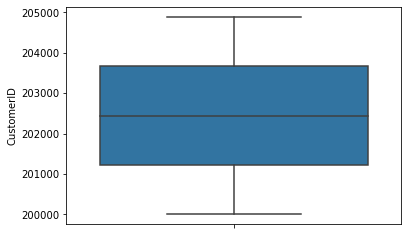

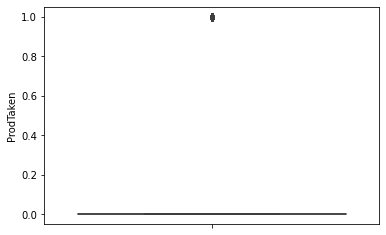

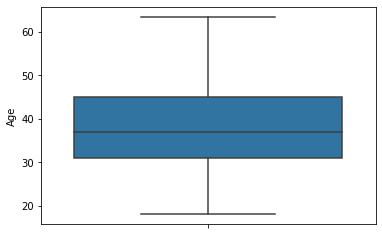

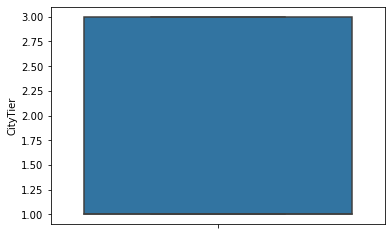

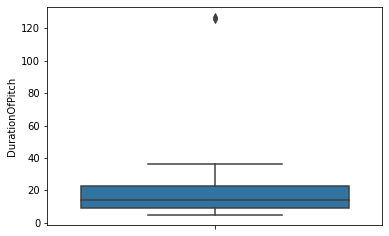

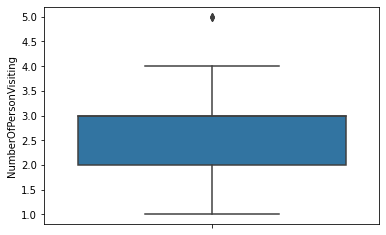

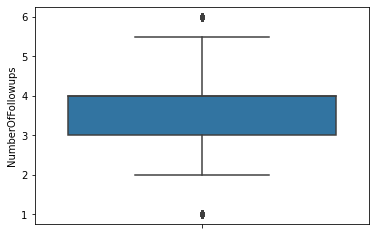

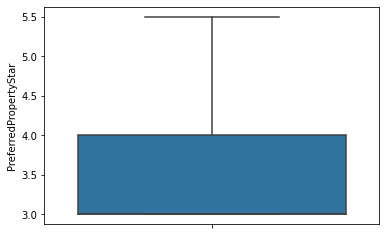

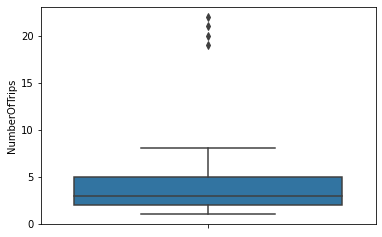

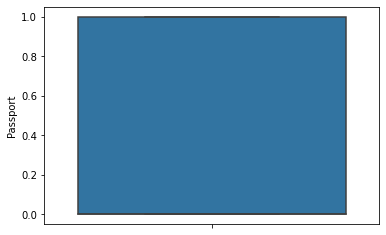

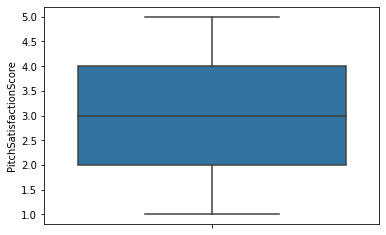

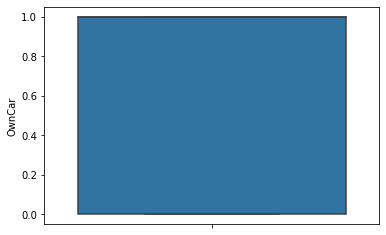

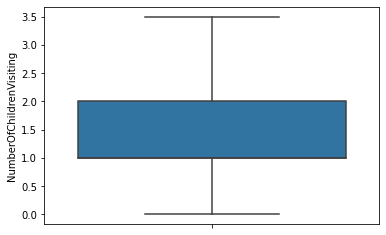

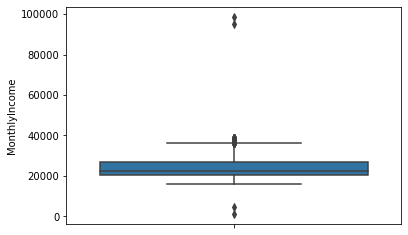

In [13]:
for column in df_num:
    sns.boxplot(y=df[column])
    plt.show()

###  DurationOfPitch, NumberOfPersonVisiting, NumberOfFollowups, NumberOfTrips, MonthlyIncome have outliers 

In [14]:
def find_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [15]:
# find limits for DurationOfPitch

DurationOfPitch_upper_limit, DurationOfPitch_lower_limit = find_boundaries(df, 'DurationOfPitch', 1.5)
DurationOfPitch_upper_limit, DurationOfPitch_lower_limit

(44.0, -12.0)

In [16]:
df[df['DurationOfPitch']>44]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,201434,0,63.5,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,203878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


In [17]:
df[df['DurationOfPitch']<-12.0]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


In [18]:
# let's flag the outliers in the data set

outliers_DurationOfPitch = np.where(df['DurationOfPitch'] > DurationOfPitch_upper_limit, True,
                       np.where(df['DurationOfPitch'] < DurationOfPitch_lower_limit, True, False))

####  Conclusion:- DurationOfPitch have two outlier after upper_limit and no outlier before lower limit

In [19]:
# find limits for NumberOfPersonVisiting

NumberOfPersonVisiting_upper_limit, NumberOfPersonVisiting_lower_limit = find_boundaries(df, 'NumberOfPersonVisiting', 1.5)
NumberOfPersonVisiting_upper_limit, NumberOfPersonVisiting_lower_limit

(4.5, 0.5)

In [20]:
df[df['NumberOfPersonVisiting']>4.5]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3977,203977,0,60.0,Self Enquiry,3,32.0,Salaried,Female,5,4.0,Standard,5.0,Unmarried,2.0,0,3,1,2.0,Senior Manager,26315.0
4002,204002,0,31.0,Self Enquiry,1,9.0,Salaried,Male,5,5.0,Deluxe,3.0,Married,3.0,0,4,1,2.0,Manager,22830.0
4105,204105,0,28.0,Self Enquiry,1,16.0,Small Business,Female,5,4.0,Basic,4.0,Single,3.0,0,3,0,2.0,Executive,20957.0


In [21]:
df[df['NumberOfPersonVisiting']<0.5]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


In [22]:
# let's flag the outliers in the data set

outliers_NumberOfPersonVisiting = np.where(df['NumberOfPersonVisiting'] > NumberOfPersonVisiting_upper_limit, True,
                       np.where(df['NumberOfPersonVisiting'] < NumberOfPersonVisiting_lower_limit, True, False))

####  Conclusion:- NumberOfPersonVisiting have three outlier after upper_limit and no outlier before lower limit

In [23]:
# find limits for NumberOfFollowups

NumberOfFollowups_upper_limit, NumberOfFollowups_lower_limit = find_boundaries(df, 'NumberOfFollowups', 1.5)
NumberOfFollowups_upper_limit, NumberOfFollowups_lower_limit

(5.5, 1.5)

In [24]:
df['NumberOfFollowups'].value_counts()

4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
5.5      45
Name: NumberOfFollowups, dtype: int64

In [25]:
# let's flag the outliers in the data set

outliers_NumberOfFollowups = np.where(df['NumberOfFollowups'] > NumberOfFollowups_upper_limit, True,
                       np.where(df['NumberOfFollowups'] < NumberOfFollowups_lower_limit, True, False))

####  Coclusion:- NumberOfFollowups have 136 outlier after upper_limit and 176 outlier before lower limit

In [26]:
# find limits for NumberOfTrips

NumberOfTrips_upper_limit, NumberOfTrips_lower_limit = find_boundaries(df, 'NumberOfTrips', 1.5)
NumberOfTrips_upper_limit, NumberOfTrips_lower_limit

(9.5, -2.5)

In [27]:
df['NumberOfTrips'].value_counts()

2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
7.0      358
6.0      322
8.0      105
19.0       1
21.0       1
20.0       1
22.0       1
Name: NumberOfTrips, dtype: int64

In [28]:
df[df['NumberOfTrips']>9.5]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,200385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,200816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,202829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,203260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0


In [29]:
# let's flag the outliers in the data set

outliers_NumberOfTrips = np.where(df['NumberOfTrips'] > NumberOfTrips_upper_limit, True,
                       np.where(df['NumberOfTrips'] < NumberOfTrips_lower_limit, True, False))

####  Conclusion:- NumberOfTrips have Four outlier after upper_limit and no outlier before lower limit

In [30]:
# find limits for MonthlyIncome

MonthlyIncome_upper_limit, MonthlyIncome_lower_limit = find_boundaries(df, 'MonthlyIncome', 1.5)
MonthlyIncome_upper_limit, MonthlyIncome_lower_limit

(36092.5, 11120.5)

In [31]:
df[df['MonthlyIncome']>36092.5].count()[0]

151

In [32]:
df[df['MonthlyIncome']<11120.5].count()[0]

2

In [33]:
# let's flag the outliers in the data set

outliers_MonthlyIncome = np.where(df['MonthlyIncome'] > MonthlyIncome_upper_limit, True,
                       np.where(df['MonthlyIncome'] < MonthlyIncome_lower_limit, True, False))

#### Conclusion:MonthlyIncome have 151 outlier after upper_limit and 2 outlier before lower limit

### let's trimm the dataset of outliers across multiple variables

In [34]:
df_trimmed = df.loc[~(outliers_DurationOfPitch + outliers_NumberOfPersonVisiting + outliers_NumberOfFollowups + outliers_NumberOfTrips +outliers_MonthlyIncome), ]

df.shape, df_trimmed.shape

((4888, 20), (4423, 20))

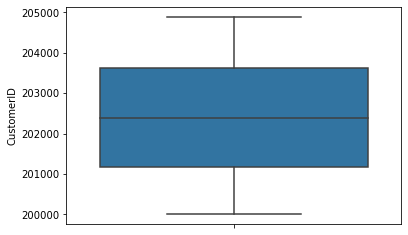

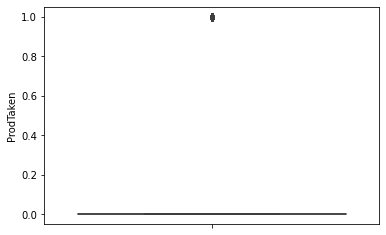

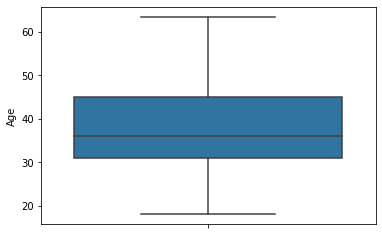

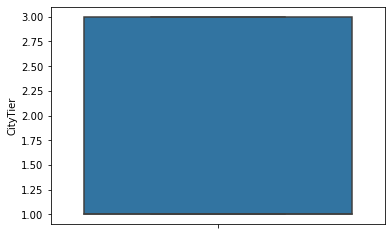

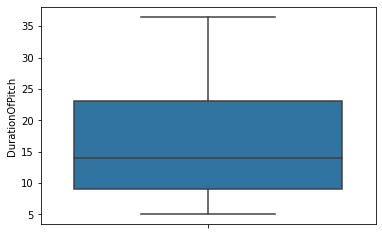

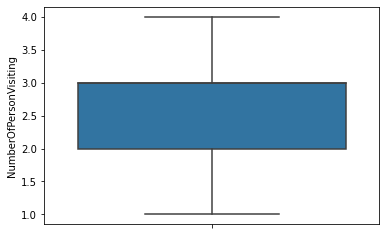

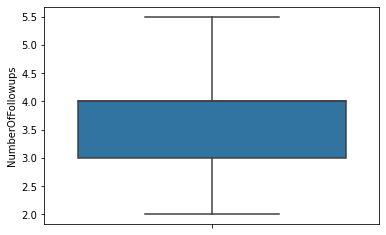

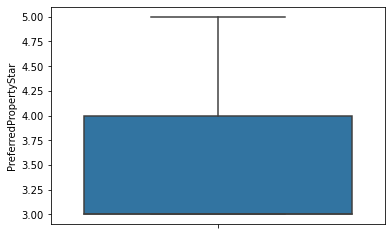

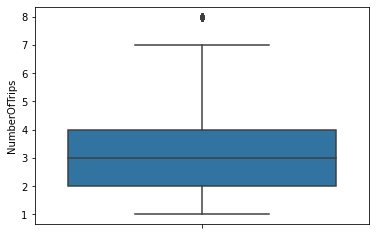

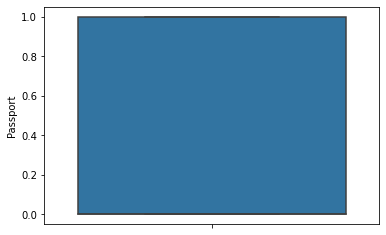

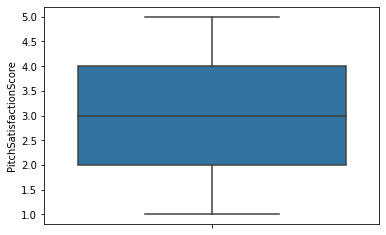

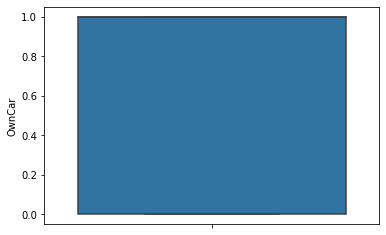

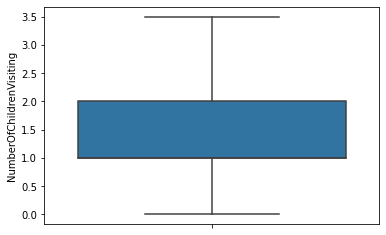

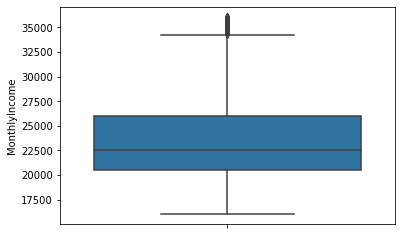

In [35]:
for column in df_num:
    sns.boxplot(y=df_trimmed[column])
    plt.show()

## Plotting Graph for all Numerical variables

In [36]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


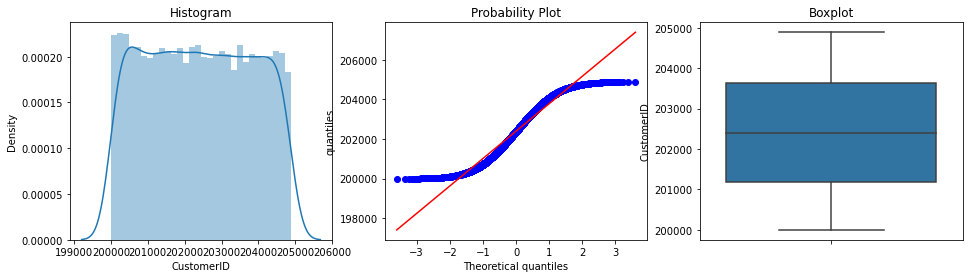

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


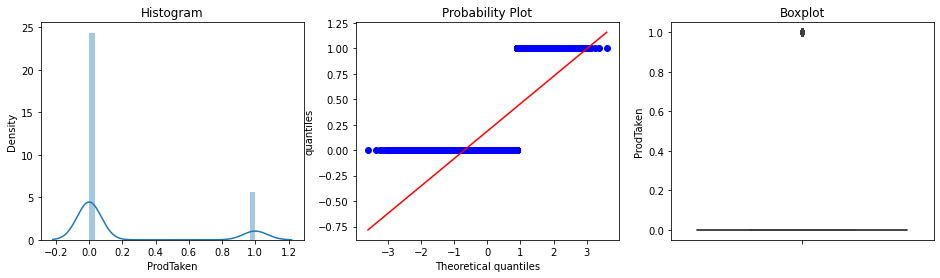

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


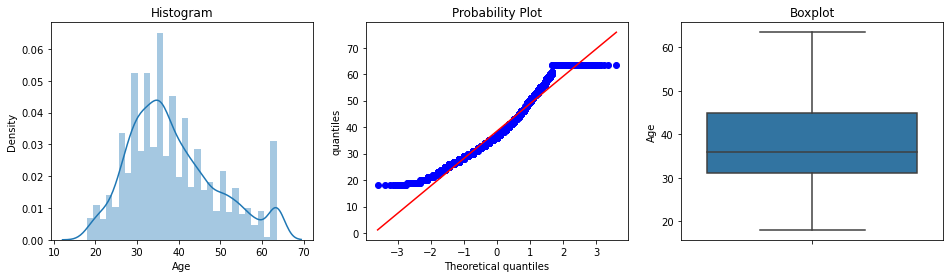

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


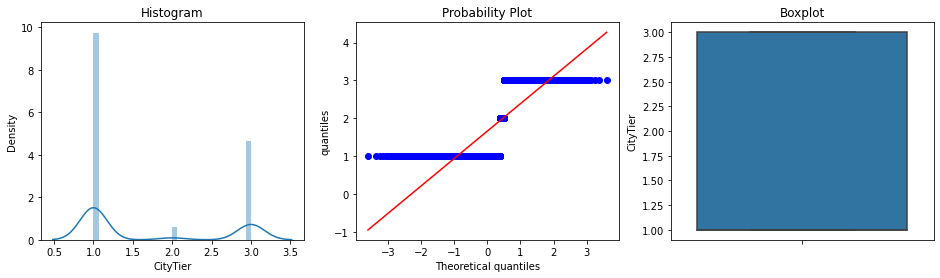

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


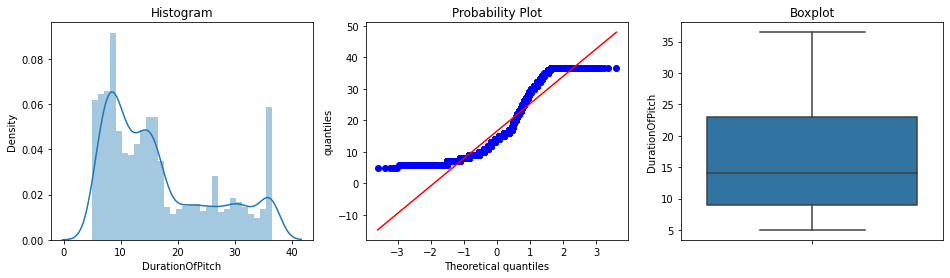

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


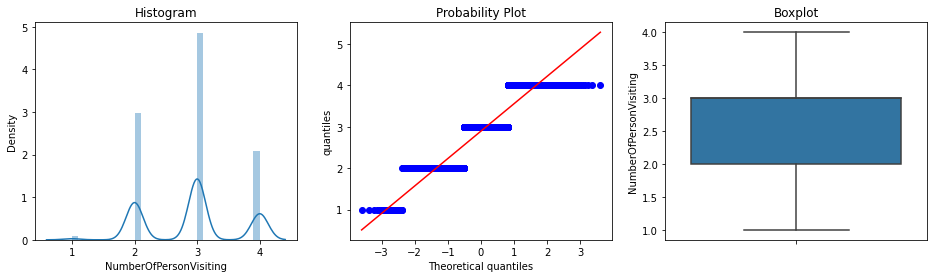

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


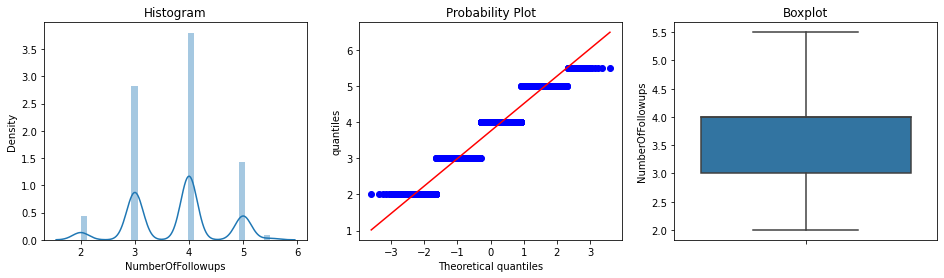

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


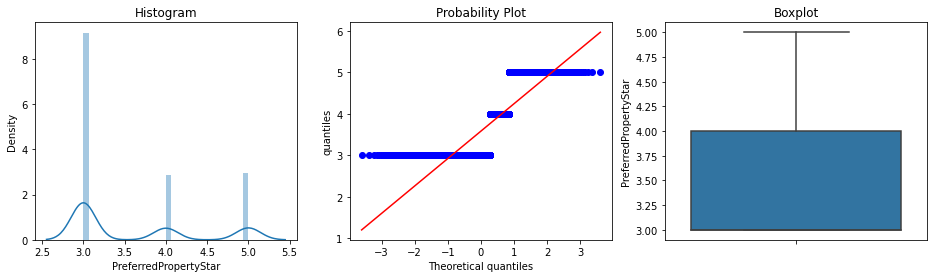

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


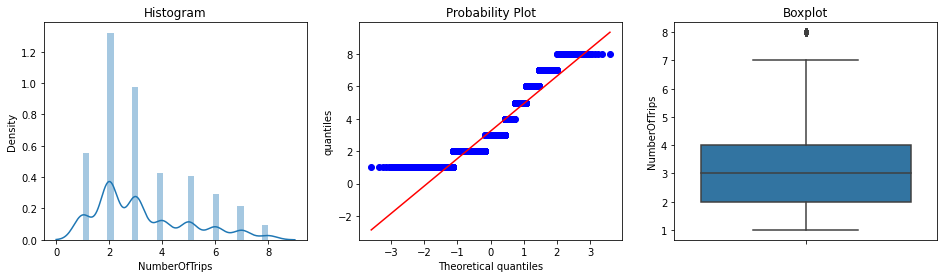

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


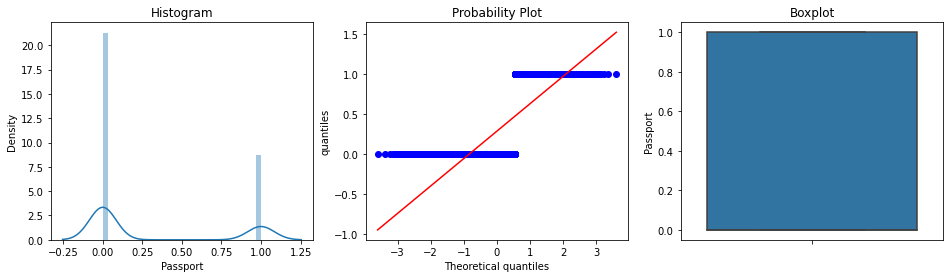

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


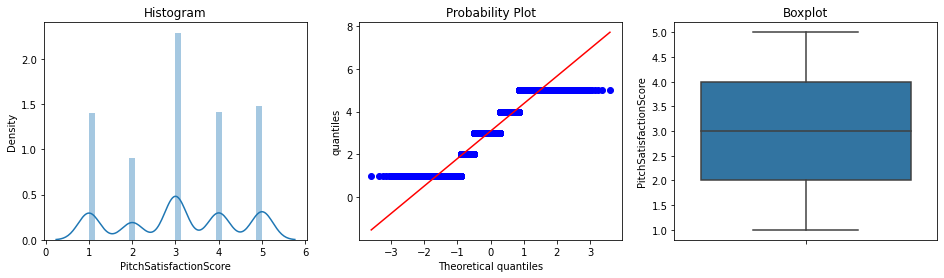

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


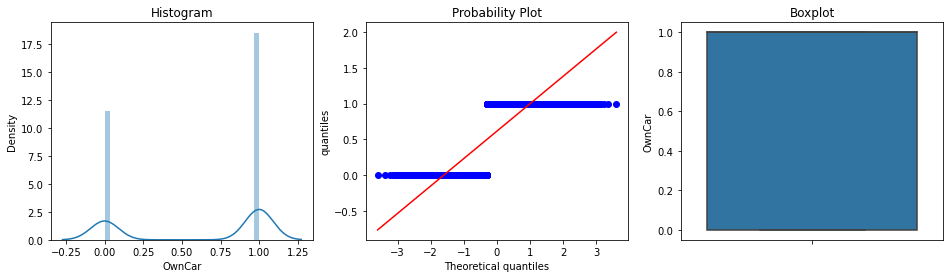

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


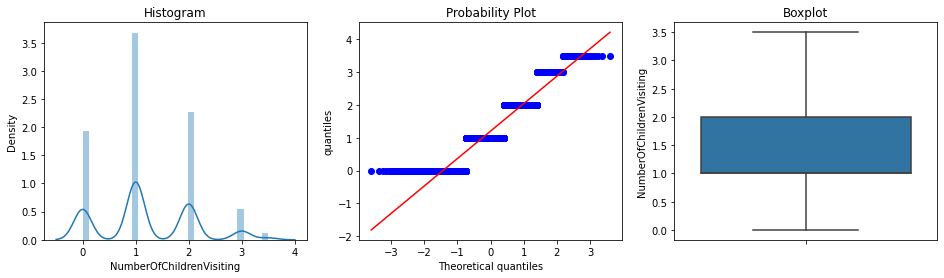

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


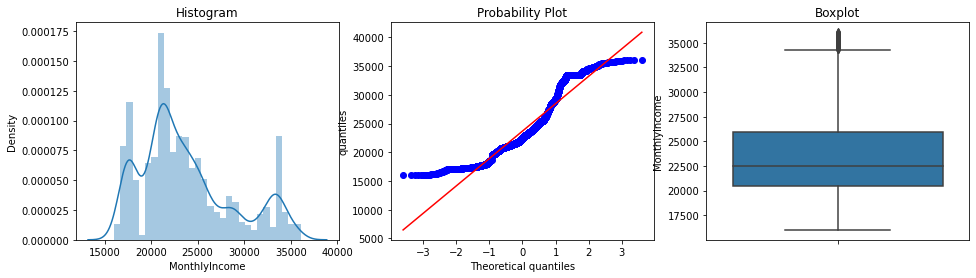

In [37]:

# let's find outliers in MonthlyIncome
for fe in df_num:
    diagnostic_plots(df_trimmed, fe)

Conclusion:- Age, DurationOfPitch and MonthlyIncome can follow Gaussian Distribution

## Standardization
Standardization involves centering the variable at zero, and standardizing the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

z = (x - x_mean) / std

In [38]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(df_trimmed[df_num])

# transform train and test sets
df_trimmed_scaled = scaler.transform(df_trimmed[df_num])

In [39]:
df_trimmed_scaled

array([[-1.6957372 ,  2.08214884,  0.23522968, ...,  0.78749382,
        -1.34833099, -0.54283714],
       [-1.69503183, -0.48027306,  0.99200259, ...,  0.78749382,
         0.88944311, -0.71626808],
       [-1.69432646,  2.08214884, -0.14315678, ..., -1.26985123,
        -1.34833099, -1.32719517],
       ...,
       [ 1.74999648,  2.08214884,  1.27579243, ...,  0.78749382,
         2.00833016,  1.63298771],
       [ 1.75070185,  2.08214884, -1.84589583, ..., -1.26985123,
         0.88944311, -0.68431499],
       [ 1.75140722,  2.08214884, -0.23775339, ...,  0.78749382,
         0.88944311,  0.06969765]])

In [40]:
# let's transform the returned NumPy arrays to dataframes

df_trimmed_scaled = pd.DataFrame(df_trimmed_scaled, columns=df_num)

In [41]:
df_trimmed_scaled

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,-1.695737,2.082149,0.235230,1.455464,-1.143635,0.146154,-0.924761,-0.733918,-1.246513,1.562697,-0.800902,0.787494,-1.348331,-0.542837
1,-1.695032,-0.480273,0.992003,-0.718639,-0.280334,0.146154,0.307789,0.519894,-0.689217,-0.639919,-0.063979,0.787494,0.889443,-0.716268
2,-1.694326,2.082149,-0.143157,-0.718639,-0.927810,0.146154,0.307789,-0.733918,2.097262,1.562697,-0.063979,-1.269851,-1.348331,-1.327195
3,-1.693621,-0.480273,-0.521543,-0.718639,-0.819897,-1.229252,-0.924761,-0.733918,-0.689217,1.562697,1.409867,0.787494,-0.229444,-1.162607
4,-1.692916,-0.480273,2.363653,-0.718639,-0.927810,-1.229252,-0.924761,0.519894,-1.246513,-0.639919,1.409867,0.787494,-1.348331,-1.050268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,1.748586,2.082149,0.992003,1.455464,-0.819897,0.146154,1.540340,0.519894,-0.689217,1.562697,-1.537824,0.787494,-0.229444,0.579138
4419,1.749291,2.082149,-0.994526,-0.718639,1.554182,1.521561,1.540340,-0.733918,-0.131921,1.562697,-0.063979,0.787494,0.889443,-0.498826
4420,1.749996,2.082149,1.275792,1.455464,0.043404,1.521561,0.307789,0.519894,2.097262,-0.639919,-1.537824,0.787494,2.008330,1.632988
4421,1.750702,2.082149,-1.845896,1.455464,-0.064509,0.146154,0.307789,-0.733918,-0.131921,-0.639919,1.409867,-1.269851,0.889443,-0.684315


### Transformation

In [42]:
# make a copy of the dataframe where we will store the modified
# variables

df_trimmed_transform = df_trimmed_scaled.copy()

In [43]:
# apply log to a set of variables
df_trimmed_transform[['DurationOfPitch']] = np.log(df_trimmed_scaled[['DurationOfPitch']])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


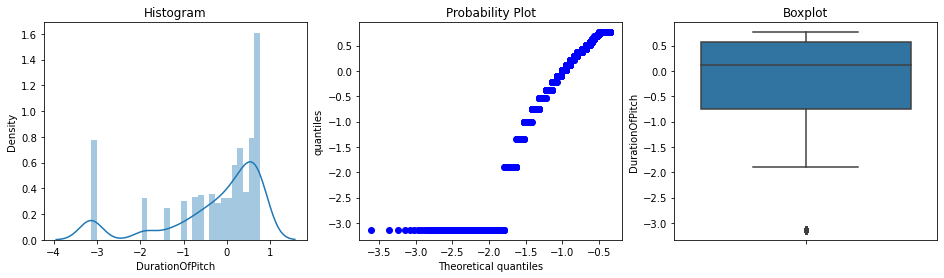

In [44]:
# use diagnostic plot function to address variable transformation

diagnostic_plots(df_trimmed_transform, 'DurationOfPitch')

In [45]:
# apply log to a set of variables
df_trimmed_transform[['MonthlyIncome']] = np.power(df_trimmed_scaled[['MonthlyIncome']],0.3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


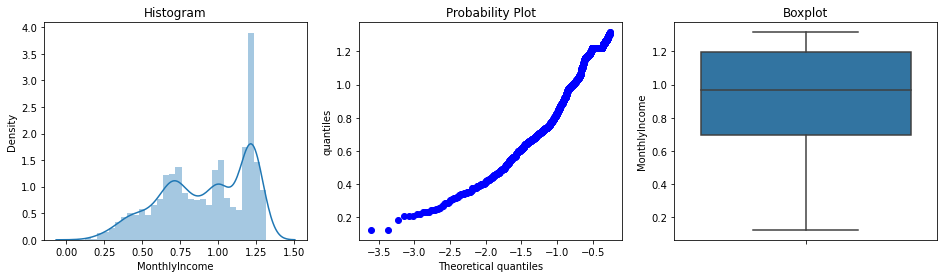

In [47]:
# use diagnostic plot function to address variable transformation

diagnostic_plots(df_trimmed_transform, 'MonthlyIncome')